 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/Titanic%20Data%20Analysis/Analysis.ipynb#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="http://localhost:8888/notebooks/Titanic%20Data%20Analysis/Analysis.ipynb#Load-dataset" data-toc-modified-id="Load-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load dataset</a></span></li><li><span><a href="http://localhost:8888/notebooks/Titanic%20Data%20Analysis/Analysis.ipynb#Questions" data-toc-modified-id="Questions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Questions</a></span></li><li><span><a href="http://localhost:8888/notebooks/Titanic%20Data%20Analysis/Analysis.ipynb#Question-1:-Factors-correlating-to-survival" data-toc-modified-id="Question-1:-Factors-correlating-to-survival-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question 1: Factors correlating to survival</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Titanic%20Data%20Analysis/Analysis.ipynb#Helper-functions" data-toc-modified-id="Helper-functions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Helper functions</a></span></li><li><span><a href="http://localhost:8888/notebooks/Titanic%20Data%20Analysis/Analysis.ipynb#Total-survival" data-toc-modified-id="Total-survival-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Total survival</a></span></li><li><span><a href="http://localhost:8888/notebooks/Titanic%20Data%20Analysis/Analysis.ipynb#Survival-by-age" data-toc-modified-id="Survival-by-age-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Survival by age</a></span></li><li><span><a href="http://localhost:8888/notebooks/Titanic%20Data%20Analysis/Analysis.ipynb#Survival-by-gender" data-toc-modified-id="Survival-by-gender-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Survival by gender</a></span></li><li><span><a href="http://localhost:8888/notebooks/Titanic%20Data%20Analysis/Analysis.ipynb#Survival-by-Pclass" data-toc-modified-id="Survival-by-Pclass-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Survival by Pclass</a></span></li><li><span><a href="http://localhost:8888/notebooks/Titanic%20Data%20Analysis/Analysis.ipynb#Survival-by-SibSp" data-toc-modified-id="Survival-by-SibSp-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Survival by SibSp</a></span></li><li><span><a href="http://localhost:8888/notebooks/Titanic%20Data%20Analysis/Analysis.ipynb#Survival-by-Parch" data-toc-modified-id="Survival-by-Parch-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Survival by Parch</a></span></li></ul></li></ul></div>

## Imports

All imports go here

In [16]:
# !pip install matplotlib

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Load dataset

In [9]:
titanic = pd.read_csv('./titanic-data.csv')

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Questions

These are the questions that I'd like to find answers to:

1. What were the factors contributing to a passenger's survival?
1. Where did higher/lower SES people embark?
1. Is there a correlation between SES and SibSP & Parch?

## Question 1: Factors correlating to survival

Here, we'll dwell in-depth into the dataset to find factors that are correlated to survival. No causation is implied.

### Helper functions

In [98]:
def continuous_survival_histogram(var):
    plt.figure()
    plt.hist(titanic[var].dropna(), label='Everyone')
    plt.hist(titanic[titanic['Survived'] == 1][var].dropna(), label='Survived')
    plt.legend(loc='upper right')
    plt.show()
    plt.close()

In [100]:
def categorical_survival_histogram(var):
    plt.figure()
    titanic[var].value_counts().plot(kind='bar', label='Everyone')
    titanic[titanic['Survived'] == 1][var].value_counts().plot(kind='bar', label='Survived', color='orange')
    plt.legend(loc='upper right')
    plt.show()
    plt.close()

### Total survival

In [97]:
total_people = titanic.shape[0]
total_survived = titanic[titanic['Survived'] == 1].shape[0]
percent_survived = 100.0 * total_survived / total_people

print("Total people:", total_people)
print("Total survived:", total_survived)
print("Percent survived:", percent_survived)

Total people: 891
Total survived: 342
Percent survived: 38.38383838383838


### Survival by age

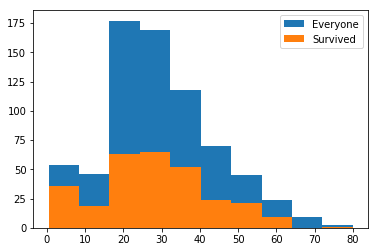

In [99]:
continuous_survival_histogram('Age')

### Survival by gender

The plot below shows that more females survived than died. More men died than they survived. Overall, more men died.

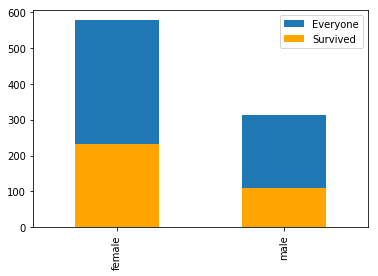

In [101]:
categorical_survival_histogram('Sex')

### Survival by Pclass

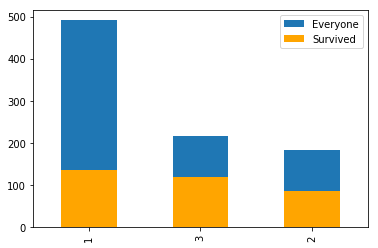

In [102]:
categorical_survival_histogram('Pclass')

### Survival by SibSp

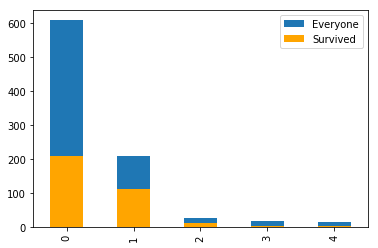

In [103]:
categorical_survival_histogram('SibSp')

### Survival by Parch

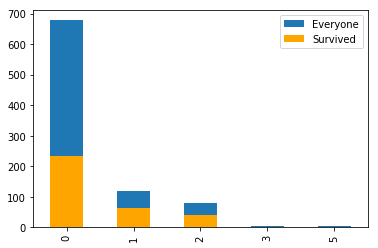

In [104]:
categorical_survival_histogram('Parch')